<a href="https://colab.research.google.com/github/joaohnt/estudo_ml/blob/main/reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import numpy as np
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile
path = '/content/drive/MyDrive/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [5]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [6]:
ids, faces = dados_imagem()

In [7]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

# classificacao

In [9]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [34]:
img_teste = '/content/yalefaces/test/subject10.sad.gif'
img = Image.open(img_teste).convert('L')
img_np = np.array(img, 'uint8')
print(img_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [35]:
idprevisto, _ = reconhecedor.predict(img_np)
print(idprevisto)

10


In [36]:
idcorreto = int(os.path.split(img_teste)[1].split('.')[0].replace('subject', ''))
print(idcorreto)

10


array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
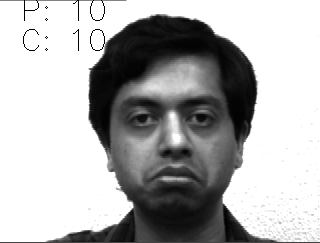

In [37]:
cv2.putText(img_np, 'P: ' + str(idprevisto), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0))
cv2.putText(img_np, 'C: ' + str(idprevisto), (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0))